# 1. Analisis de la calidad de los datos

In [5]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv("SaratogaHouses.csv")

# Mostrar las primeras filas del DataFrame para verificar
df.head()


,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes


El dataset saratogahouses.csv es un conjunto de datos comúnmente utilizado en análisis de datos y aprendizaje estadístico, especialmente en ejemplos relacionados con la predicción de precios de viviendas. Contiene información sobre casas en Saratoga Springs, Nueva York, y sus características.

In [6]:
df.shape

(1728, 16)

Tenemos un dataset de 16 columnas y 1728 registros.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            1728 non-null   int64  
 1   lotSize          1728 non-null   float64
 2   age              1728 non-null   int64  
 3   landValue        1728 non-null   int64  
 4   livingArea       1728 non-null   int64  
 5   pctCollege       1728 non-null   int64  
 6   bedrooms         1728 non-null   int64  
 7   fireplaces       1728 non-null   int64  
 8   bathrooms        1728 non-null   float64
 9   rooms            1728 non-null   int64  
 10  heating          1728 non-null   object 
 11  fuel             1728 non-null   object 
 12  sewer            1728 non-null   object 
 13  waterfront       1728 non-null   object 
 14  newConstruction  1728 non-null   object 
 15  centralAir       1728 non-null   object 
dtypes: float64(2), int64(8), object(6)
memory usage: 216.1+ KB


Tenemos columnas de tipo object, int y float, sin valores nulos.

**Significado de cada columna:**

  - price: El precio de venta de la casa en dólares estadounidenses.

  - lotSize: El tamaño del lote de la propiedad en acres. Un acre es una unidad de medida de superficie utilizada comúnmente para terrenos. Un acre equivale a 4,047 metros cuadrados.

  - age: La antigüedad de la casa en años.

  - landValue: El valor del terreno en dólares.

  - livingArea: El área habitable de la casa en pies cuadrados.

  - pctCollege: El porcentaje de residentes en la zona que tienen un título universitario.

  - bedrooms: El número de dormitorios en la casa.

  - fireplaces: El número de chimeneas en la casa.

  - bathrooms: El número de baños en la casa. Este valor puede ser un número decimal (ej. 2.5 significa dos baños completos y un medio baño).

  - rooms: El número total de habitaciones en la casa.

  - heating: El tipo de sistema de calefacción utilizado (ej. "electric", "hot water/steam", "hot air").

  - fuel: El tipo de combustible utilizado para la calefacción (ej. "electric", "gas", "oil").

  - sewer: El tipo de sistema de alcantarillado utilizado (ej. "septic", "public/commercial", "none").

  - waterfront: Indica si la propiedad tiene acceso al agua ("Yes" o "No"). Hace referencia a lagos, rios o mar.

  - newConstruction: Indica si la casa es de nueva construcción ("Yes" o "No").

  - centralAir: Indica si la casa tiene aire acondicionado central ("Yes" o "No").


In [8]:
df.describe()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,211966.705440,0.500214,27.916088,34557.187500,1754.975694,55.567708,3.154514,0.601852,1.900174,7.041667
std,98441.391015,0.698680,29.209988,35021.168056,619.935553,10.333581,0.817351,0.556102,0.658352,2.316453
min,5000.000000,0.000000,0.000000,200.000000,616.000000,20.000000,1.000000,0.000000,0.000000,2.000000
25%,145000.000000,0.170000,13.000000,15100.000000,1300.000000,52.000000,3.000000,0.000000,1.500000,5.000000
50%,189900.000000,0.370000,19.000000,25000.000000,1634.500000,57.000000,3.000000,1.000000,2.000000,7.000000
75%,259000.000000,0.540000,34.000000,40200.000000,2137.750000,64.000000,4.000000,1.000000,2.500000,8.250000
max,775000.000000,12.200000,225.000000,412600.000000,5228.000000,82.000000,7.000000,4.000000,4.500000,12.000000


# 2. Analisis exploratorio  con herramientas visuales

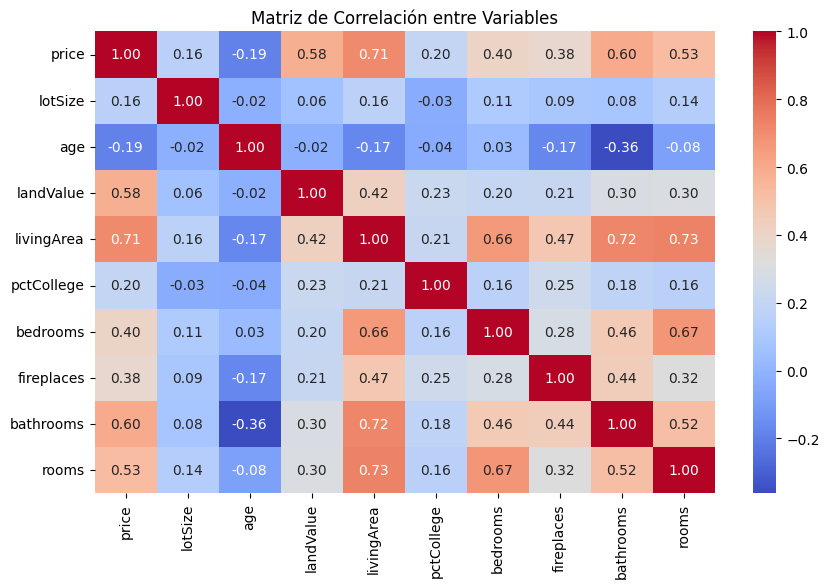

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

columnas_numericas = df.select_dtypes(include=['number'])


# Mapa de calor de correlaciones
plt.figure(figsize=(10, 6))
corr_matrix = columnas_numericas.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación entre Variables")
plt.show()

La variable objetivo price tiene una buena relacion con el resto de variables, por lo que todas son relevantes. A su vez, el resto de variables no tienen una correlacion excesiva entre si, lo que vuelve a confirmar la validez de todas ellas.

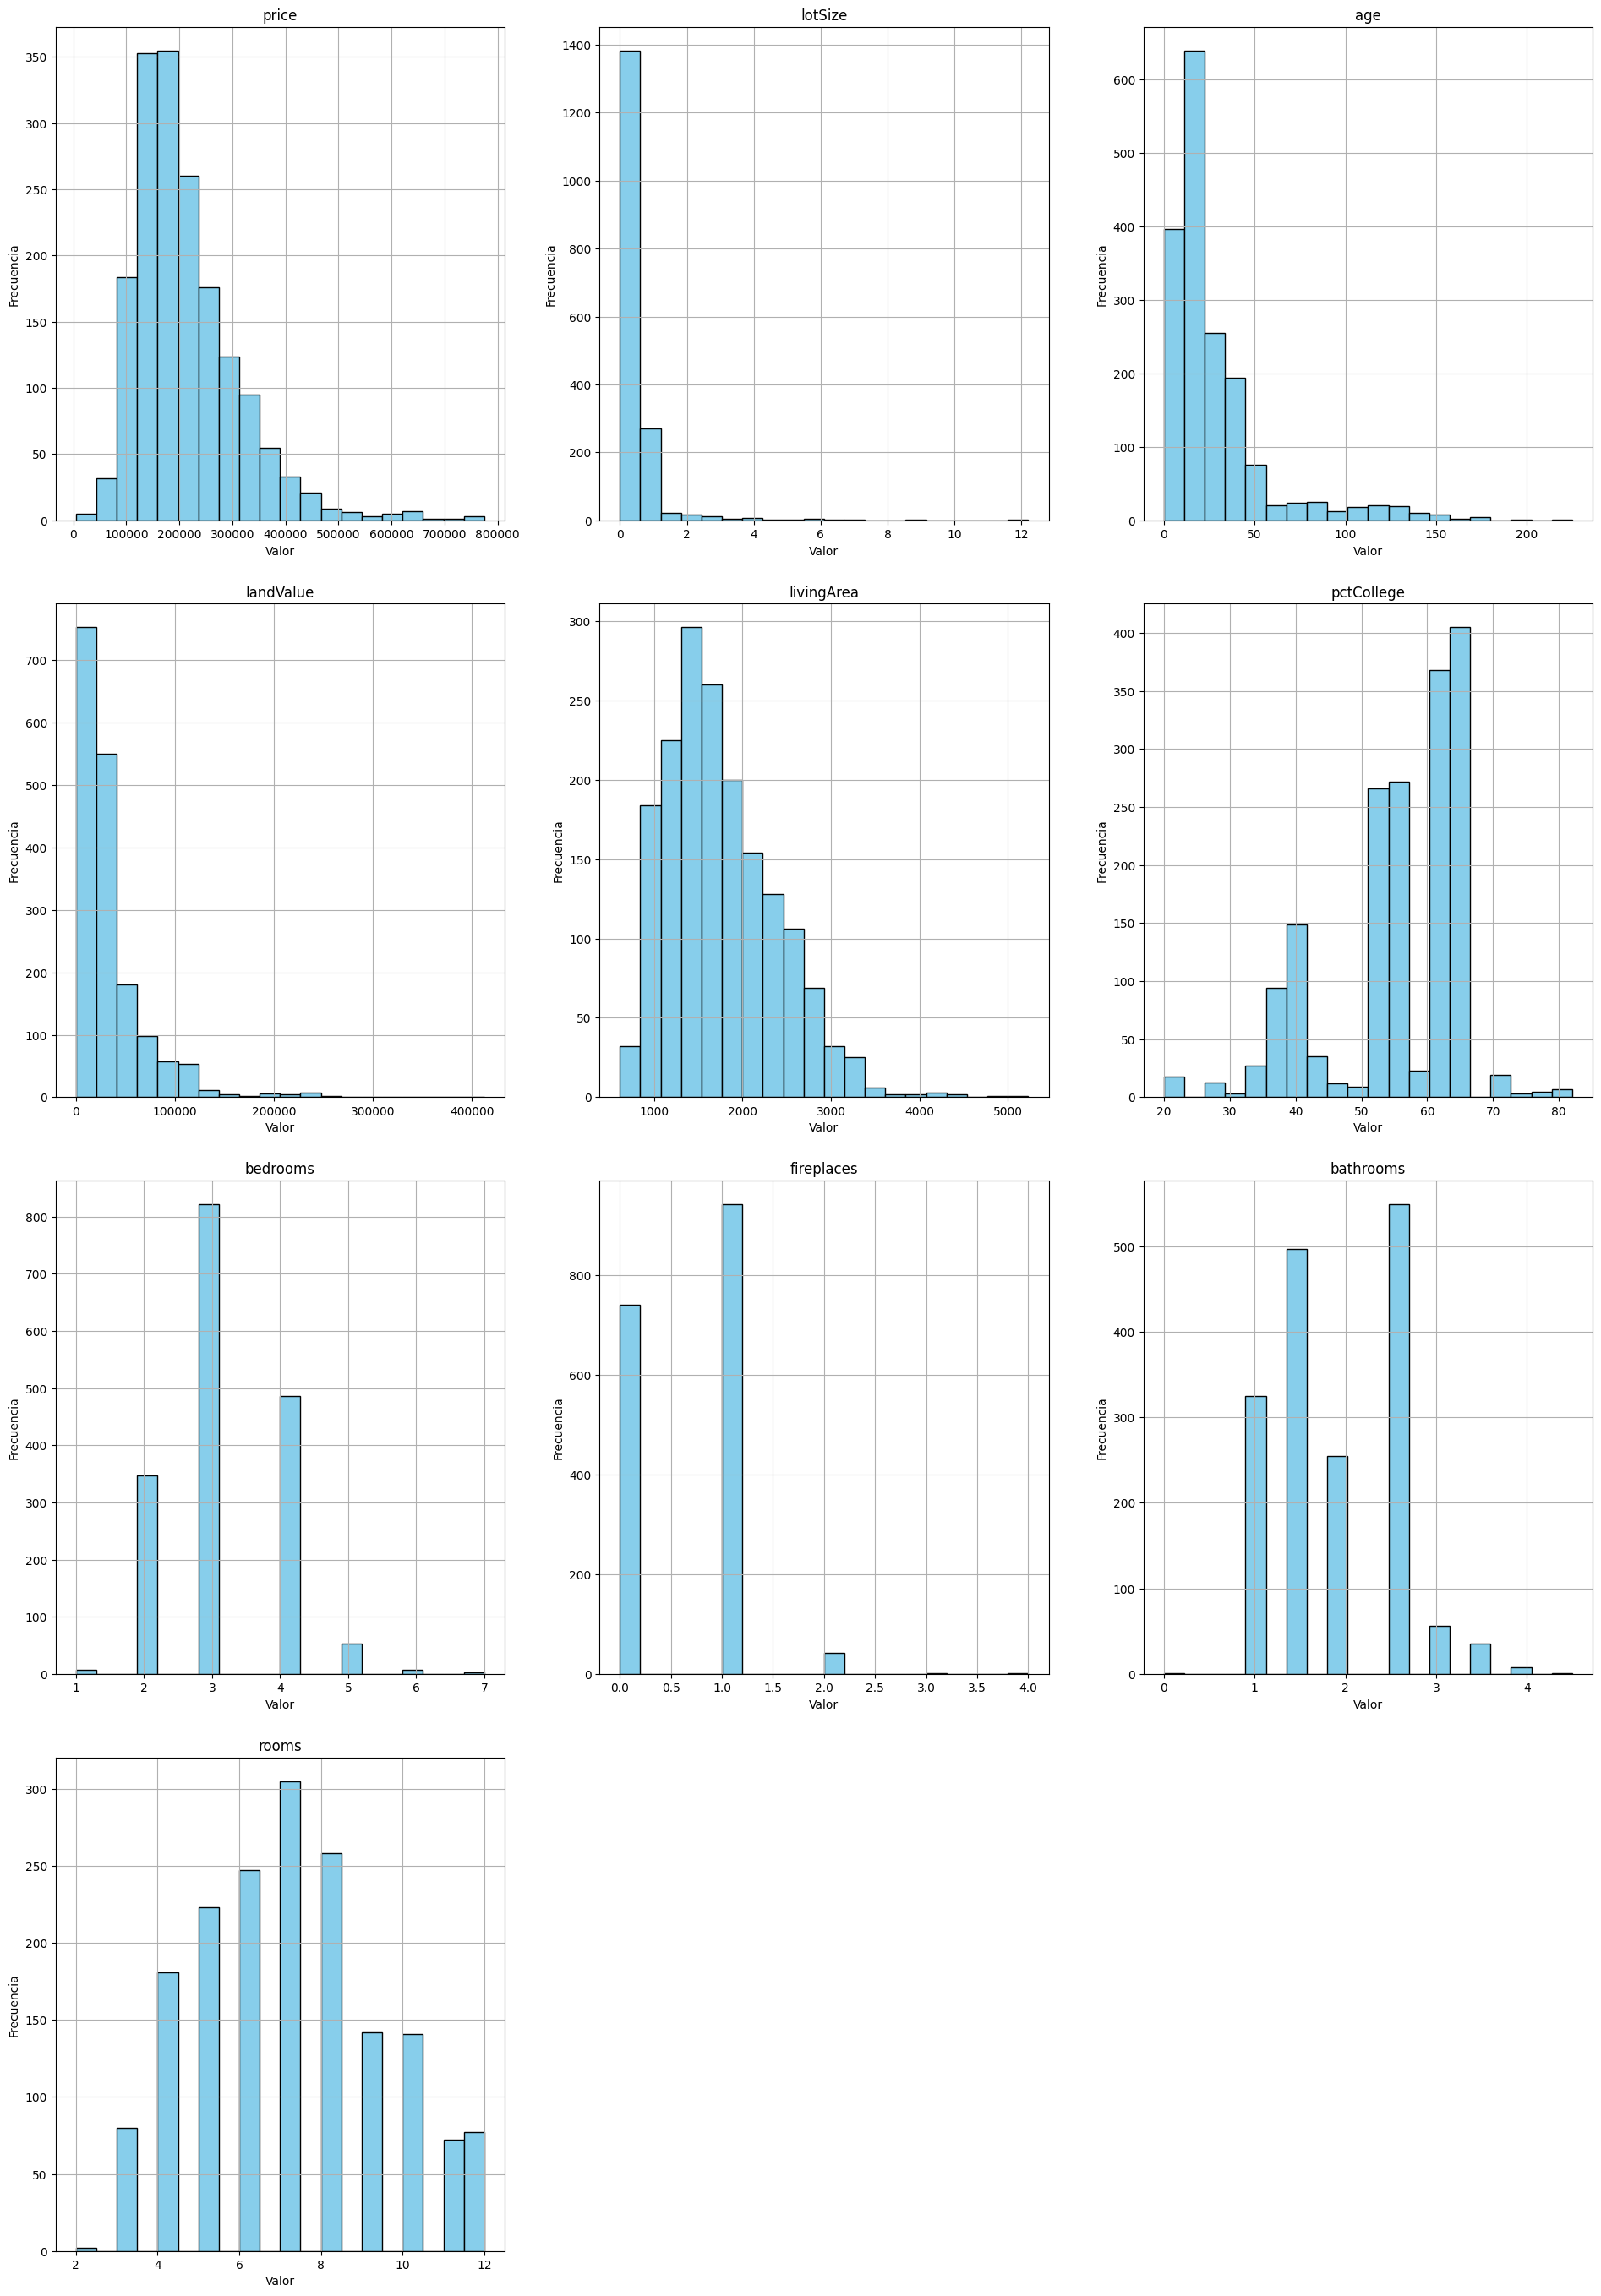

In [10]:
# Seleccionar las columnas numéricas
numeric_columns = df.select_dtypes(include=['number']).columns

# Calcular el número de filas y columnas para los subplots
num_cols = 3
num_rows = (len(numeric_columns) + num_cols - 1) // num_cols

# Crear la figura y los subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 7*num_rows))
fig.tight_layout(pad=5.0)

# Aplanar el array de axes para facilitar la iteración
axes = axes.flatten()

# Iterar sobre las columnas numéricas y crear los histogramas
for i, column in enumerate(numeric_columns):
    ax = axes[i]
    ax.hist(df[column], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(column)
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frecuencia')
    ax.grid(True)

# Eliminar los subplots vacíos si el número de columnas no es múltiplo de num_cols
if len(numeric_columns) % num_cols != 0:
    for i in range(len(numeric_columns), num_rows * num_cols):
        fig.delaxes(axes[i])

# Mostrar la figura
plt.show()

*   **price:** La distribución de los precios muestra una asimetría positiva, lo que indica que la mayoría de las casas tienen precios más bajos y hay menos casas con precios muy altos. La concentración mayor se encuentra en el rango de 100,000 a 200,000.
*   **lotSize:** La mayoría de los lotes son pequeños, con un gran número de propiedades con tamaños de lote menores a 2 acres.
*   **age:** La mayoría de las casas son relativamente recientes (menores de 50 años), con una alta frecuencia de casas nuevas.
*   **landValue:** La distribución del valor del terreno también tiene una asimetría positiva, con una mayor frecuencia de terrenos de valor bajo.
*   **livingArea:** La mayoría de las casas tienen áreas habitables moderadas, con una concentración entre 1000 y 2000 pies cuadrados.
*   **pctCollege:** Hay una concentración significativa de personas con un porcentaje alto de graduados universitarios entre el 50% y el 70%.
*   **bedrooms:** La mayoría de las casas tienen entre 3 y 4 habitaciones.
*   **fireplaces:** La mayoría de las casas tienen una o ninguna chimenea.
*   **bathrooms:** La mayoría de las casas tienen 1 o 2 baños.
*   **rooms:** La mayoría de las casas tienen entre 6 y 8 habitaciones.

En resumen, el mercado inmobiliario parece estar dominado por casas relativamente jóvenes y con tamaños de lote y áreas habitables moderados, y con una fuerte concentración de precios más bajos.


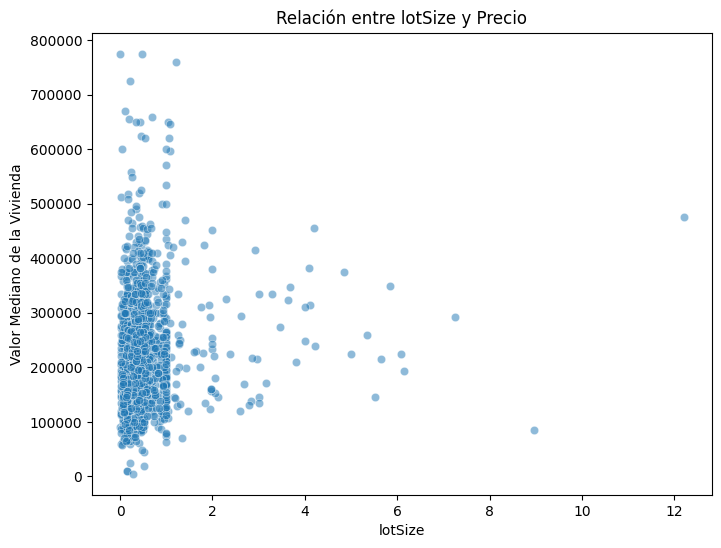

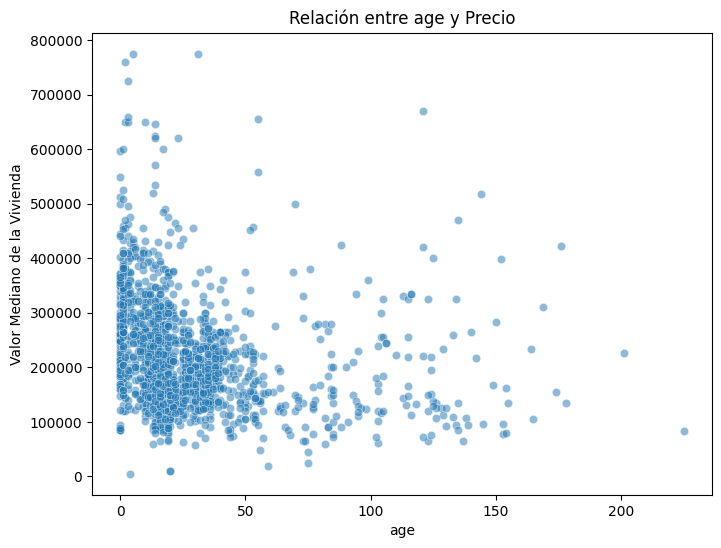

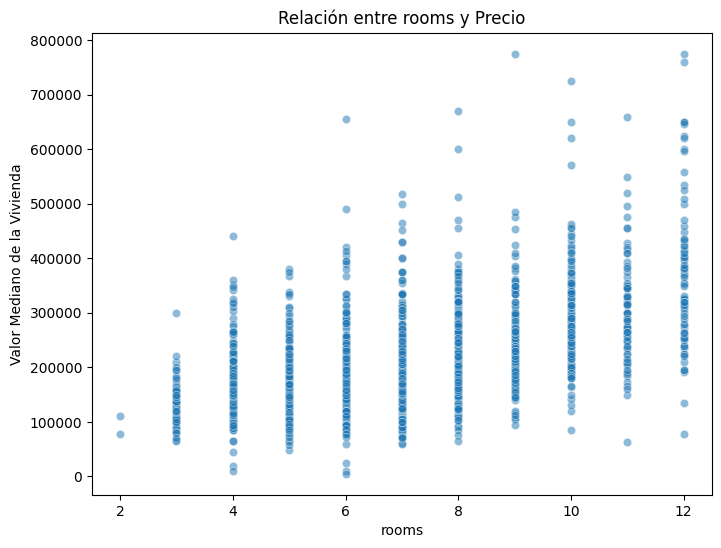

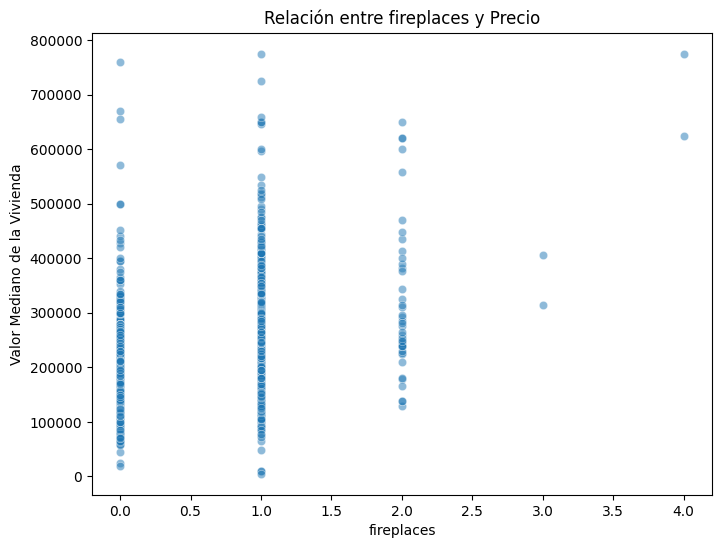

In [11]:
# Diagramas de dispersión para las demás variables
variables = ["lotSize","age", "rooms", "fireplaces"]
for var in variables:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[var], y=df["price"], alpha=0.5)
    plt.title(f"Relación entre {var} y Precio")
    plt.xlabel(var)
    plt.ylabel("Valor Mediano de la Vivienda")
    plt.show()

*   **lotSize:** Existe una alta concentración de datos en lotes pequeños y un aumento gradual del precio con el tamaño del lote. Sin embargo, la relación es dispersa, lo que indica que otros factores también influyen en el precio de las viviendas.

*   **age:** Hay una tendencia a que las viviendas más nuevas tengan precios más altos. Las casas muy antiguas también pueden tener precios altos debido a su valor histórico o ubicación privilegiada.

*   **rooms:** Las viviendas con más habitaciones tienden a tener precios más altos, ya que suelen ofrecer más espacio habitable y comodidad.

*   **fireplaces:** Las viviendas con chimeneas tienen precios más altos. La mayoría de las viviendas tienen una o ninguna chimenea.


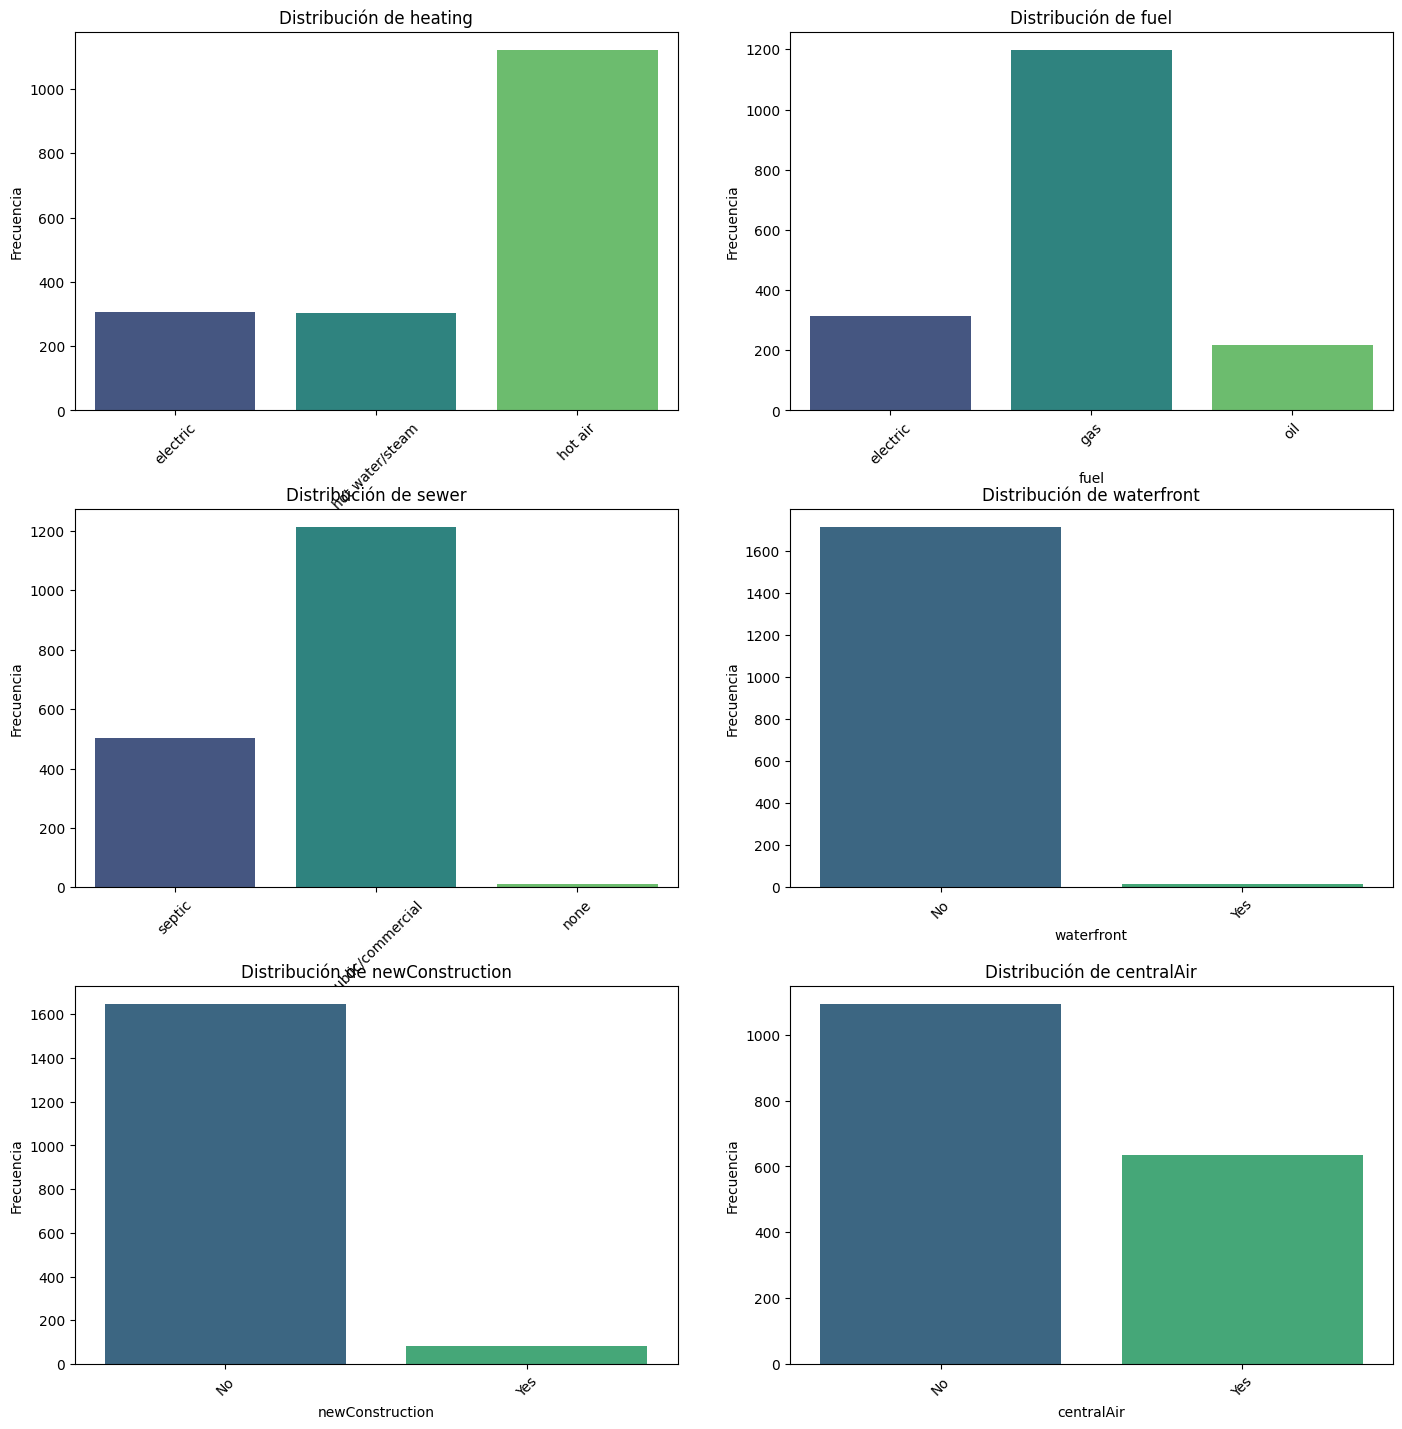

In [12]:
# Seleccionar las columnas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns

# Calcular el número de filas y columnas para los subplots
num_cols = 2
num_rows = (len(categorical_columns) + num_cols - 1) // num_cols

# Crear la figura y los subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.tight_layout(pad=5.0)

# Aplanar el array de axes para facilitar la iteración
axes = axes.flatten()

# Iterar sobre las columnas categóricas y crear los gráficos de barras
for i, column in enumerate(categorical_columns):
    ax = axes[i]
    sns.countplot(data=df, x=column, hue=column, ax=ax, palette="viridis", legend=False)
    ax.set_title(f'Distribución de {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frecuencia')
    ax.tick_params(axis='x', rotation=45)

# Eliminar los subplots vacíos si el número de columnas no es múltiplo de num_cols
if len(categorical_columns) % num_cols != 0:
    for i in range(len(categorical_columns), num_rows * num_cols):
        fig.delaxes(axes[i])

# Mostrar la figura
plt.show()


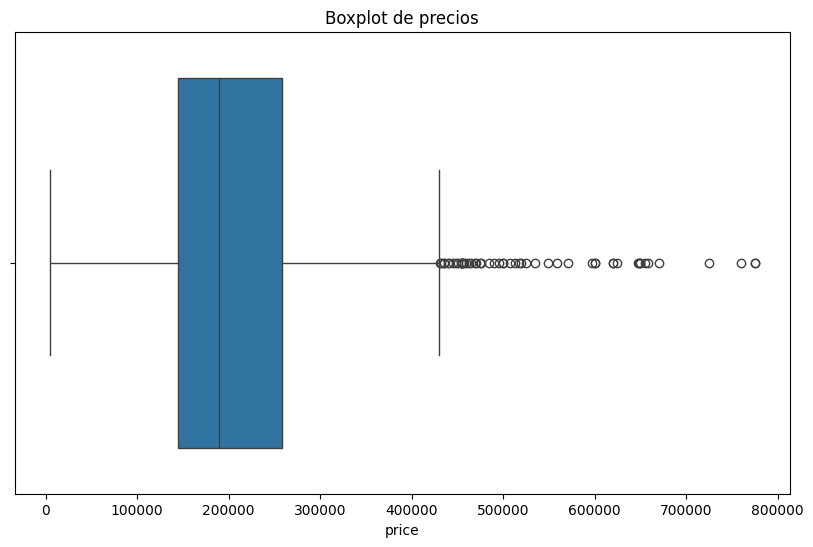

In [13]:
# Boxplot para detectar outliers en el precio
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot de precios')
plt.show()

# 3. Preprocesado de los datos para el problema a resolver.

In [14]:
print(df.duplicated().sum())

7


Tenemos 7 filas duplicadas, las eliminamos:

In [15]:
df = df.drop_duplicates()

## Transformacion de variables

Codificacion de variables categoricas

In [16]:
import numpy as np

# Identificar columnas categóricas y numéricas
numeric_features = df.select_dtypes(include=np.number).columns.tolist()
categorical_features = df.select_dtypes(exclude=np.number).columns.tolist()

# Imprimir los valores únicos de cada variable categórica
for column in categorical_features:
    print(f"Valores únicos de la columna {column}:")
    print(df[column].unique())
    print("\n")

Valores únicos de la columna heating:
['electric' 'hot water/steam' 'hot air']


Valores únicos de la columna fuel:
['electric' 'gas' 'oil']


Valores únicos de la columna sewer:
['septic' 'public/commercial' 'none']


Valores únicos de la columna waterfront:
['No' 'Yes']


Valores únicos de la columna newConstruction:
['No' 'Yes']


Valores únicos de la columna centralAir:
['No' 'Yes']




Como no son muchas categorias, podemos aplicar Dummy Encoding a todas

In [17]:
df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.head()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating_hot air,heating_hot water/steam,fuel_gas,fuel_oil,sewer_public/commercial,sewer_septic,waterfront_Yes,newConstruction_Yes,centralAir_Yes
0,132500,0.09,42,50000,906,35,2,1,1.0,5,False,False,False,False,False,True,False,False,False
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,False,True,True,False,False,True,False,False,False
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,False,True,True,False,True,False,False,False,False
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,True,False,True,False,False,True,False,False,False
4,86060,0.11,0,15000,840,51,2,0,1.0,3,True,False,True,False,True,False,False,True,True


# 4. Comparación de distintos modelos de regresion

## Modelo sin escalar las entradas

Epoch 1/18


/home/federico/saratoga/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-07 21:15:17.821334: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 52591480832.0000 - val_loss: 54542729216.0000
Epoch 2/18
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 50633183232.0000 - val_loss: 50691203072.0000
Epoch 3/18
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 45181272064.0000 - val_loss: 34183616512.0000
Epoch 4/18
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 27843053568.0000 - val_loss: 16493429760.0000
Epoch 5/18
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17713295360.0000 - val_loss: 16055630848.0000
Epoch 6/18
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17319219200.0000 - val_loss: 15527398400.0000
Epoch 7/18
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 16737554432.0000 - val_loss: 15002129408.0000
Epoch 8/18
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 16062797824.0000 - val_loss: 14151098368.0000
Epoch 9/18
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15249186816.0000 - val_loss: 13177088000.0000
Epoch 10/18
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14099787776.0000

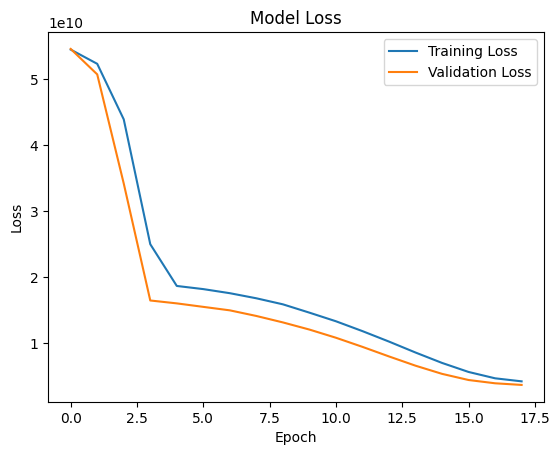

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf

# Establecer una semilla para reproducibilidad
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Asumiendo que ya tienes el DataFrame preprocesado 'df_encoded'
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Definir el modelo de red neuronal secuencial
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # Capa de salida para regresión (una sola neurona)
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Definir early stopping
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=18,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R2: {r2}")

# Visualizar la pérdida durante el entrenamiento
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()





In [19]:
df['price'].describe() 

count      1721.000000
mean     212203.641488
std       98540.055951
min        5000.000000
25%      145000.000000
50%      189900.000000
75%      259142.000000
max      775000.000000
Name: price, dtype: float64

El RMSE mide el error promedio entre las predicciones y los valores reales. En este caso, un RMSE de 64.547 USD significa que, en promedio, el modelo se equivoca en 64.547 dólares al predecir el precio de una casa. Dado que la desviación estándar del precio en los datos es 98,540 dólares, el error es considerable, pero no excesivo.

El r² de 0'56 indica que el modelo explica aproximadamente el 56% de la variabilidad en los precios de las casas.
Aunque no es un resultado excelente, sí muestra que el modelo tiene cierta capacidad de predicción, pero aún deja un 44% de la variabilidad sin explicar.

## Modelo escalando las entradas

Epoch 1/150


/home/federico/saratoga/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 52007579648.0000 - val_loss: 55558266880.0000
Epoch 2/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 52006506496.0000 - val_loss: 55554891776.0000
Epoch 3/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 52001513472.0000 - val_loss: 55541141504.0000
Epoch 4/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 51982417920.0000 - val_loss: 55496749056.0000
Epoch 5/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 51925426176.0000 - val_loss: 55383605248.0000
Epoch 6/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 51789312000.0000 - val_loss: 55145590784.0000
Epoch 7/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 51516039168.0000 - val_loss: 54709424128.0000
Epoch 8/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 51032236032.0000 - val_loss: 53990174720.0000
Epoch 9/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 50254987264.0000 - val_loss: 52895989760.0000
Epoch 10/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4909664

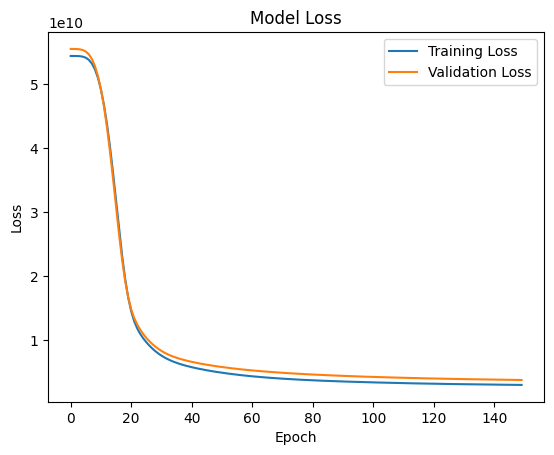

In [20]:
from sklearn.preprocessing import StandardScaler

# Establecer una semilla para reproducibilidad
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Asumiendo que ya tienes el DataFrame preprocesado 'df_encoded'
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir el modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Definir early stopping
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=150,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluar el modelo
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R2: {r2}")

# Visualizar la pérdida durante el entrenamiento
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


Despues de la normalizacion, el RMSE bajó a 62,365 dólares (antes era 64.547 dólares) y el R² aumentó a 0.59 (antes era 0.56).

Vamos a quedarnos con el modelo de mejor resultado (con las variables independientes escaladas) y vamos a compararlo con el mismo modelo escalando la variable de salida.

## Modelo escalando la variable de salida

Epoch 1/200


/home/federico/saratoga/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.9610 - val_loss: 1.4952
Epoch 2/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.4843 - val_loss: 1.3060
Epoch 3/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3318 - val_loss: 1.2037
Epoch 4/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2699 - val_loss: 1.1386
Epoch 5/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1254 - val_loss: 1.0639
Epoch 6/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0708 - val_loss: 1.0106
Epoch 7/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0486 - val_loss: 0.9651
Epoch 8/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0088 - val_loss: 0.9176
Epoch 9/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9319 - val_loss: 0.8690
Epoch 10/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8869 - val_loss: 0.8360
Epoch 11/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8531 - val_loss: 0.7898
Epoch 12/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7876 - val_lo

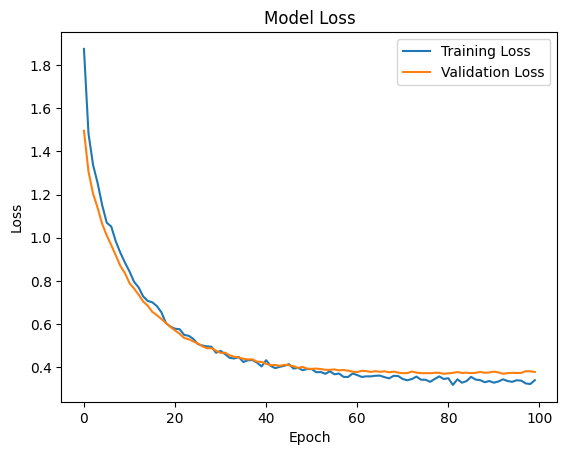

In [21]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Establecer semilla para reproducibilidad
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Asumiendo que ya tienes el DataFrame preprocesado 'df_encoded'
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Escalar los datos de entrada
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Escalar la variable dependiente
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Definir el modelo
model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1)
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Definir early stopping
early_stopping = EarlyStopping(patience=20, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(
    X_train_scaled, y_train_scaled,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluar el modelo
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R2: {r2}")

# Visualizar la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


RMSE bajó a 59,090 dólares (antes 62,365 dólares).
R² aumentó a 0.63 (antes 0.59).

El modelo anterior con la variable objetivo escalada sufria de sobreajuste, por lo que tuvimos que aplicar:

- Regularización L2: Se ha añadido regularización L2 a las capas densas.

- Dropout: Se han añadido capas de Dropout para reducir el sobreajuste.

- Early Stopping: Se aumentó la paciencia del callback de Early Stopping.

- Epochs: Se aumentaron las epochs.

Vamos a comparar exactamente el mismo modelo sin escalar y.

## Mismo modelo sin escalar y

Epoch 1/200


/home/federico/saratoga/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 52007411712.0000 - val_loss: 55557890048.0000
Epoch 2/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 52006072320.0000 - val_loss: 55554420736.0000
Epoch 3/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 52001136640.0000 - val_loss: 55541776384.0000
Epoch 4/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 51983994880.0000 - val_loss: 55503597568.0000
Epoch 5/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 51935612928.0000 - val_loss: 55407353856.0000
Epoch 6/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 51817963520.0000 - val_loss: 55199219712.0000
Epoch 7/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 51569631232.0000 - val_loss: 54804336640.0000
Epoch 8/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 51140726784.0000 - val_loss: 54141833216.0000
Epoch 9/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 50447347712.0000 - val_loss: 53109633024.0000
Epoch 10/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4927922

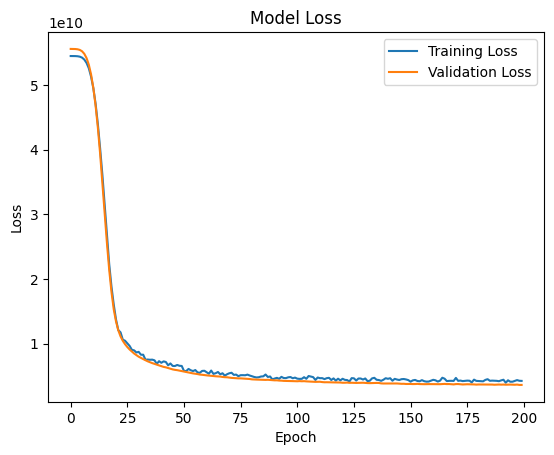

In [22]:
# Establecer semilla para reproducibilidad
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Asumiendo que ya tienes el DataFrame preprocesado 'df_encoded'
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Escalar los datos de entrada
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Definir el modelo
model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1)
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Definir early stopping
early_stopping = EarlyStopping(patience=20, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluar el modelo
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R2: {r2}")

# Visualizar la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


Comparando ambos resultados:  

| Métrica | y sin escalar | y escalada | Diferencia |  
|---------|---------------|------------|------------|  
| **RMSE** | 61,375.74 | 59,090.43 | **↓ 2,285.31** (mejora) |  
| **R²** | 0.603 | 0.632 | **↑ 0.029** (mejora) |  

Podemos obtener la conclusion de que escalar y ayuda a obtener mejores resultados en las dos metricas.

## Comparación de diferentes modelos utilizando métodos de optimización de hiperparámetros.

Como no tenemos demasiados registros, vamos a comparar modelos utilizando Grid Search y Hyperband

## Modelo optimizado con Grid Search

**Grid Search** es un método de **búsqueda exhaustiva** para encontrar la mejor combinación de hiperparámetros en un modelo de Machine Learning. Funciona probando **todas** las combinaciones posibles de los valores especificados para cada hiperparámetro y evaluando cuál da los mejores resultados.

### 🔹 **Cómo funciona Grid Search**
1. **Definir los hiperparámetros** que queremos optimizar. Ejemplo: número de neuronas en una capa, tasa de aprendizaje, tipo de optimizador, etc.
2. **Especificar un conjunto de valores** para cada hiperparámetro.
3. **Generar todas las combinaciones posibles** de los valores de los hiperparámetros.
4. **Entrenar y evaluar el modelo** con cada combinación.
5. **Elegir la mejor combinación** basada en la métrica de evaluación (precisión, pérdida, etc.).


**Ventajas**
- Fácil de implementar.
- Encuentra la mejor combinación dentro de los valores especificados.

**Desventajas**
- **Muy costoso computacionalmente**, ya que prueba todas las combinaciones posibles.
- No es eficiente si los valores óptimos están entre los que especificamos, pero no exactamente en la lista.

Reloading Tuner from grid_search/house_price_prediction/tuner0.json
Mejores hiperparámetros: {'units_1': 32, 'l2_reg': 0.0001, 'dropout_1': 0.2, 'units_2': 16, 'dropout_2': 0.2, 'learning_rate': 0.0050118723362727255}
Epoch 1/200


/home/federico/saratoga/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3775 - val_loss: 0.5627
Epoch 2/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6273 - val_loss: 0.4191
Epoch 3/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4928 - val_loss: 0.4345
Epoch 4/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4990 - val_loss: 0.4524
Epoch 5/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4744 - val_loss: 0.4296
Epoch 6/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4370 - val_loss: 0.4339
Epoch 7/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4772 - val_loss: 0.4340
Epoch 8/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4327 - val_loss: 0.4080
Epoch 9/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4260 - val_loss: 0.4191
Epoch 10/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4235 - val_loss: 0.3898
Epoch 11/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4110 - val_loss: 0.3845
Epoch 12/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3829 - val_lo

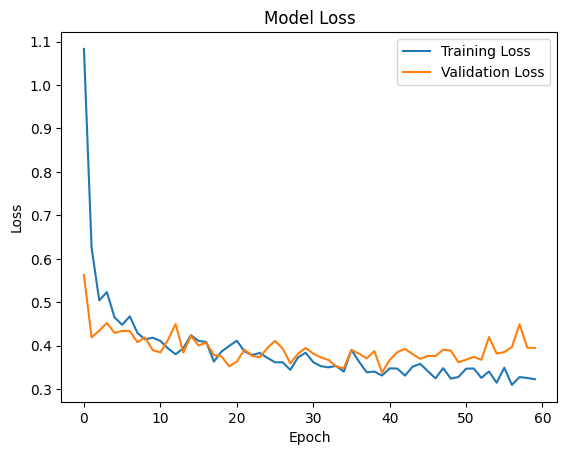

In [23]:
import numpy as np
import tensorflow as tf
import keras_tuner as kt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Establecer semilla para reproducibilidad
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Asumiendo que ya tienes el DataFrame preprocesado 'df_encoded'
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Escalar los datos de entrada
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Escalar la variable dependiente
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Definir la función para construir el modelo con hiperparámetros
def build_model(hp):
    model = Sequential()
    model.add(Dense(
        units=hp.Int('units_1', min_value=32, max_value=128, step=32),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_reg', 1e-4, 1e-2, sampling='LOG')),
        input_shape=(X_train.shape[1],)
    ))
    model.add(Dropout(hp.Float('dropout_1', 0.2, 0.5, step=0.1)))
    
    model.add(Dense(
        units=hp.Int('units_2', min_value=16, max_value=64, step=16),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_reg', 1e-4, 1e-2, sampling='LOG'))
    ))
    model.add(Dropout(hp.Float('dropout_2', 0.2, 0.5, step=0.1)))

    model.add(Dense(
        units=hp.Int('units_2', min_value=16, max_value=64, step=16),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_reg', 1e-4, 1e-2, sampling='LOG'))
    ))
    model.add(Dropout(hp.Float('dropout_2', 0.2, 0.5, step=0.1)))

    model.add(Dense(
        units=hp.Int('units_2', min_value=16, max_value=64, step=16),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_reg', 1e-4, 1e-2, sampling='LOG'))
    ))
    model.add(Dropout(hp.Float('dropout_2', 0.2, 0.5, step=0.1)))
    
    model.add(Dense(1))  # Capa de salida para regresión
    
    model.compile(
        optimizer=Adam(learning_rate=hp.Float('learning_rate', 1e-4, 1e-2, sampling='LOG')),
        loss='mean_squared_error'
    )
    return model

# Crear el objeto GridSearch para optimizar los hiperparámetros
tuner = kt.GridSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=2,
    directory='grid_search',
    project_name='house_price_prediction'
)

# Definir early stopping
early_stopping = EarlyStopping(patience=20, restore_best_weights=True)

# Ejecutar la búsqueda
tuner.search(
    X_train_scaled, y_train_scaled,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Obtener los mejores hiperparámetros
best_hps = tuner.get_best_hyperparameters()[0]
print(f"Mejores hiperparámetros: {best_hps.values}")

# Entrenar el modelo con los mejores hiperparámetros
model = tuner.hypermodel.build(best_hps)
history = model.fit(
    X_train_scaled, y_train_scaled,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluar el modelo
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R2: {r2}")

# Visualizar la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


## Modelo optimizado con Random Search  

**Random Search** es un método de **optimización de hiperparámetros** que selecciona combinaciones aleatorias en lugar de probar todas las posibles, como en **Grid Search**. Se utiliza para encontrar buenos valores de hiperparámetros sin necesidad de explorar todo el espacio de búsqueda, lo que lo hace más eficiente en términos de tiempo y computación.

### 🔹 **Cómo funciona Random Search**  
1. **Definir los hiperparámetros** que queremos optimizar (ejemplo: número de neuronas en una capa, tasa de aprendizaje, tipo de optimizador, etc.).  
2. **Especificar un rango de valores** para cada hiperparámetro.
3. **Elegir combinaciones aleatorias** dentro de estos valores, en lugar de probar todas las combinaciones posibles.  
4. **Entrenar y evaluar el modelo** con cada combinación aleatoria seleccionada.  
5. **Seleccionar la mejor combinación** basada en la métrica de evaluación (precisión, pérdida, etc.).  

### **Ventajas**  
- **Más eficiente que Grid Search**, ya que no prueba todas las combinaciones.  
- Puede encontrar buenas combinaciones con menos pruebas.  

### **Desventajas**  
- No garantiza encontrar la mejor combinación posible, ya que algunas opciones pueden no ser exploradas.  
- Puede requerir más pruebas que otros métodos como la optimización bayesiana para encontrar valores óptimos.  


Reloading Tuner from random_search/house_price_prediction/tuner0.json
Mejores hiperparámetros: {'units_1': 96, 'l2_reg': 0.00032650301626459646, 'dropout_1': 0.2, 'units_2': 48, 'dropout_2': 0.30000000000000004, 'learning_rate': 0.001361970670184066}
Epoch 1/200


/home/federico/saratoga/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8999 - val_loss: 0.3981
Epoch 2/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5177 - val_loss: 0.3862
Epoch 3/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4902 - val_loss: 0.3881
Epoch 4/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4727 - val_loss: 0.3794
Epoch 5/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4156 - val_loss: 0.3663
Epoch 6/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4494 - val_loss: 0.3659
Epoch 7/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3683 - val_loss: 0.3652
Epoch 8/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4103 - val_loss: 0.3718
Epoch 9/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3827 - val_loss: 0.3786
Epoch 10/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3914 - val_loss: 0.3779
Epoch 11/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3508 - val_loss: 0.3797
Epoch 12/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3402 - val_lo

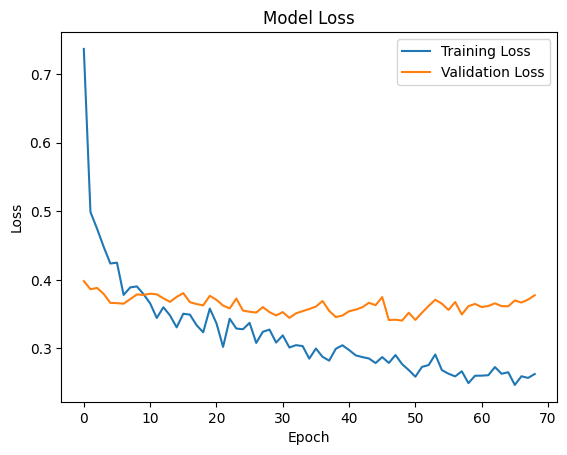

In [24]:
import numpy as np
import tensorflow as tf
import keras_tuner as kt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Establecer semilla para reproducibilidad
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Asumiendo que ya tienes el DataFrame preprocesado 'df_encoded'
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Escalar los datos de entrada
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Escalar la variable dependiente
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Definir la función para construir el modelo con hiperparámetros
def build_model(hp):
    model = Sequential()
    model.add(Dense(
        units=hp.Int('units_1', min_value=32, max_value=128, step=32),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_reg', 1e-4, 1e-2, sampling='LOG')),
        input_shape=(X_train.shape[1],)
    ))
    model.add(Dropout(hp.Float('dropout_1', 0.2, 0.5, step=0.1)))
    
    model.add(Dense(
        units=hp.Int('units_2', min_value=16, max_value=64, step=16),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_reg', 1e-4, 1e-2, sampling='LOG'))
    ))
    model.add(Dropout(hp.Float('dropout_2', 0.2, 0.5, step=0.1)))
    
    model.add(Dense(1))  # Capa de salida para regresión
    
    model.compile(
        optimizer=Adam(learning_rate=hp.Float('learning_rate', 1e-4, 1e-2, sampling='LOG')),
        loss='mean_squared_error'
    )
    return model

# Crear el objeto RandomSearch para optimizar los hiperparámetros
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=2,
    directory='random_search',
    project_name='house_price_prediction'
)

# Definir early stopping
early_stopping = EarlyStopping(patience=20, restore_best_weights=True)

# Ejecutar la búsqueda
tuner.search(
    X_train_scaled, y_train_scaled,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Obtener los mejores hiperparámetros
best_hps = tuner.get_best_hyperparameters()[0]
print(f"Mejores hiperparámetros: {best_hps.values}")

# Entrenar el modelo con los mejores hiperparámetros
model = tuner.hypermodel.build(best_hps)
history = model.fit(
    X_train_scaled, y_train_scaled,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluar el modelo
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R2: {r2}")

# Visualizar la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


## Modelo optimizado con Bayesian Optimization  

**Bayesian Optimization** es un método avanzado de **optimización de hiperparámetros** que utiliza modelos probabilísticos para seleccionar los mejores valores de hiperparámetros de manera eficiente. A diferencia de **Grid Search** y **Random Search**, que prueban combinaciones sin considerar resultados previos, la optimización bayesiana **aprende de las pruebas anteriores** para elegir de forma más inteligente los siguientes hiperparámetros a probar.  

### 🔹 **Cómo funciona Bayesian Optimization**  
1. **Definir los hiperparámetros** a optimizar (ejemplo: número de neuronas en una capa, tasa de aprendizaje, tipo de optimizador, etc.).  
2. **Especificar un rango de valores** para cada hiperparámetro.  
3. **Utilizar un modelo probabilístico** (como un **Proceso Gaussiano**) para predecir qué combinaciones tienen más probabilidades de mejorar el rendimiento.  
4. **Probar nuevas combinaciones basadas en estas predicciones**, en lugar de elegirlas de manera aleatoria o exhaustiva.  
5. **Actualizar el modelo probabilístico** con los nuevos resultados y repetir hasta encontrar la mejor combinación.  


### **Ventajas**  
- **Más eficiente** que Grid Search y Random Search, ya que aprende de los resultados anteriores.  
- Encuentra combinaciones óptimas en menos pruebas.  
- Reduce el tiempo de entrenamiento al probar solo valores prometedores.  

### **Desventajas**  
- **Más complejo de implementar** y requiere más recursos computacionales que Random Search.  
- Puede quedar atrapado en un **mínimo local**, perdiéndose combinaciones óptimas globales.  

Si buscas una optimización rápida y eficiente, **Bayesian Optimization** es una excelente opción. 🚀

Reloading Tuner from bayesian_optimization/house_price_prediction/tuner0.json
Mejores hiperparámetros: {'units_1': 32, 'l2_reg': 0.0001, 'dropout_1': 0.2, 'units_2': 16, 'dropout_2': 0.4, 'learning_rate': 0.01}
Epoch 1/200


/home/federico/saratoga/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8611 - val_loss: 0.4345
Epoch 2/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4801 - val_loss: 0.3656
Epoch 3/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4677 - val_loss: 0.3704
Epoch 4/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4555 - val_loss: 0.3456
Epoch 5/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5035 - val_loss: 0.3572
Epoch 6/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4162 - val_loss: 0.3856
Epoch 7/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4244 - val_loss: 0.3575
Epoch 8/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4733 - val_loss: 0.3696
Epoch 9/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4204 - val_loss: 0.3565
Epoch 10/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4207 - val_loss: 0.3566
Epoch 11/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3812 - val_loss: 0.3844
Epoch 12/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4246 - val_lo

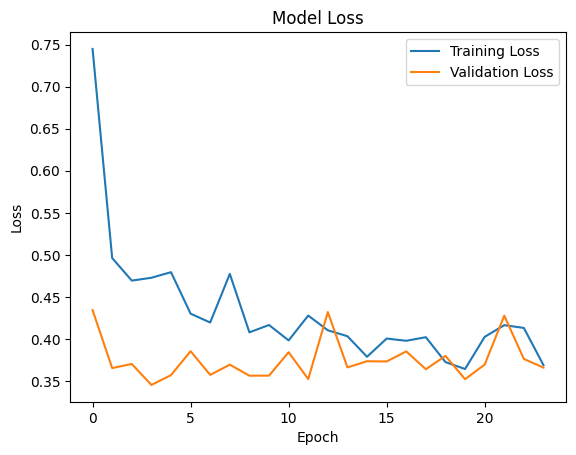

In [25]:
import numpy as np
import tensorflow as tf
import keras_tuner as kt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Establecer semilla para reproducibilidad
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Asumiendo que ya tienes el DataFrame preprocesado 'df_encoded'
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Escalar los datos de entrada
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Escalar la variable dependiente
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Definir la función para construir el modelo con hiperparámetros
def build_model(hp):
    model = Sequential()
    model.add(Dense(
        units=hp.Int('units_1', min_value=32, max_value=128, step=32),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_reg', 1e-4, 1e-2, sampling='LOG')),
        input_shape=(X_train.shape[1],)
    ))
    model.add(Dropout(hp.Float('dropout_1', 0.2, 0.5, step=0.1)))
    
    model.add(Dense(
        units=hp.Int('units_2', min_value=16, max_value=64, step=16),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_reg', 1e-4, 1e-2, sampling='LOG'))
    ))
    model.add(Dropout(hp.Float('dropout_2', 0.2, 0.5, step=0.1)))
    
    model.add(Dense(1))  # Capa de salida para regresión
    
    model.compile(
        optimizer=Adam(learning_rate=hp.Float('learning_rate', 1e-4, 1e-2, sampling='LOG')),
        loss='mean_squared_error'
    )
    return model

# Crear el objeto BayesianOptimization para optimizar los hiperparámetros
tuner = kt.BayesianOptimization(
    build_model,
    objective='val_loss',
    max_trials=10,
    num_initial_points=3,
    alpha=1e-4,
    beta=2.6,
    seed=SEED,
    directory='bayesian_optimization',
    project_name='house_price_prediction'
)

# Definir early stopping
early_stopping = EarlyStopping(patience=20, restore_best_weights=True)

# Ejecutar la búsqueda
tuner.search(
    X_train_scaled, y_train_scaled,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Obtener los mejores hiperparámetros
best_hps = tuner.get_best_hyperparameters()[0]
print(f"Mejores hiperparámetros: {best_hps.values}")

# Entrenar el modelo con los mejores hiperparámetros
model = tuner.hypermodel.build(best_hps)
history = model.fit(
    X_train_scaled, y_train_scaled,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluar el modelo
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R2: {r2}")

# Visualizar la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


## Modelo optimizado con Hyperband  

**Hyperband** es un método de **optimización de hiperparámetros** basado en la técnica de **Successive Halving**. Su objetivo es asignar los recursos de manera más eficiente al descartar rápidamente configuraciones de hiperparámetros poco prometedoras y enfocarse en las más prometedoras.  

### 🔹 **Cómo funciona Hyperband**  
1. **Definir los hiperparámetros** a optimizar (por ejemplo, número de neuronas, tasa de aprendizaje, tipo de optimizador, etc.).  
2. **Especificar un rango de valores** para cada hiperparámetro.  
3. **Probar muchas configuraciones con pocos recursos al inicio** (por ejemplo, pocas épocas o pocos datos).  
4. **Descartar las configuraciones de peor rendimiento** y reasignar los recursos a las mejores configuraciones.  
5. **Repetir el proceso** hasta encontrar la mejor combinación de hiperparámetros.  

### **Ventajas**  
- **Mucho más rápido** que Grid Search y Random Search.  
- **Reduce el uso innecesario de recursos**, ya que descarta rápidamente opciones poco prometedoras.  
- **Escala bien con grandes conjuntos de datos y modelos profundos.**  

### **Desventajas**  
- Puede descartar configuraciones que serían buenas si se entrenaran más tiempo.  
- No garantiza explorar todas las combinaciones posibles.  

**Hyperband** es ideal para optimizar modelos de **Deep Learning**, ya que ahorra tiempo y recursos sin comprometer demasiado la calidad del modelo.

Trial 180 Complete [00h 00m 03s]
val_loss: 0.33755096793174744

Best val_loss So Far: 0.3335467278957367
Total elapsed time: 01h 50m 29s
Mejores hiperparámetros: {'units_1': 96, 'l2_reg': 0.00012394975995726136, 'dropout_1': 0.2, 'units_2': 48, 'dropout_2': 0.4, 'learning_rate': 0.000448535777457729, 'tuner/epochs': 30, 'tuner/initial_epoch': 10, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0157'}


Epoch 1/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2040 - val_loss: 0.5589
Epoch 2/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7057 - val_loss: 0.4786
Epoch 3/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6419 - val_loss: 0.4593
Epoch 4/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5159 - val_loss: 0.4351
Epoch 5/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5350 - val_loss: 0.4094
Epoch 6/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5432 - val_loss: 0.4065
Epoch 7/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4586 - val_loss: 0.4037
Epoch 8/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4859 - val_loss: 0.3953
Epoch 9/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4590 - val_loss: 0.3831
Epoch 10/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4492 - val_loss: 0.3888
Epoch 11/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4359 - val_loss: 0.3860
Epoch 12/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4

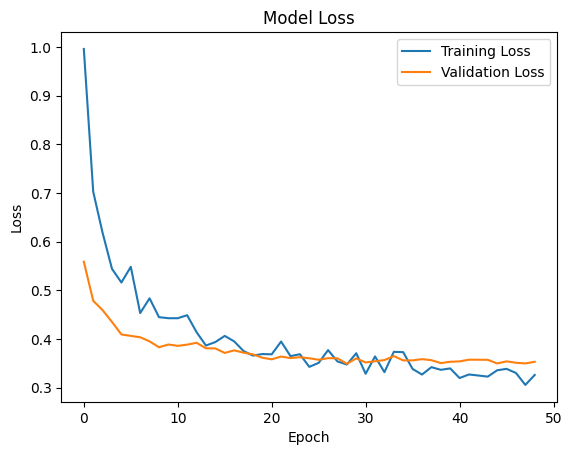

In [26]:
# Establecer semilla para reproducibilidad
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Asumiendo que ya tienes el DataFrame preprocesado 'df_encoded'
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Escalar los datos de entrada
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Escalar la variable dependiente
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()


# Definir la función para construir el modelo con hiperparámetros
def build_model(hp):
    model = Sequential()
    model.add(Dense(
        units=hp.Int('units_1', min_value=32, max_value=128, step=32),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_reg', 1e-4, 1e-2, sampling='LOG')),
        input_shape=(X_train.shape[1],)
    ))
    model.add(Dropout(hp.Float('dropout_1', 0.2, 0.5, step=0.1)))
    
    model.add(Dense(
        units=hp.Int('units_2', min_value=16, max_value=64, step=16),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_reg', 1e-4, 1e-2, sampling='LOG'))
    ))
    model.add(Dropout(hp.Float('dropout_2', 0.2, 0.5, step=0.1)))
    
    model.add(Dense(1))  # Capa de salida para regresión
    
    model.compile(
        optimizer=Adam(learning_rate=hp.Float('learning_rate', 1e-4, 1e-2, sampling='LOG')),
        loss='mean_squared_error'
    )
    return model

# Crear el objeto `Hyperband` para la optimización de hiperparámetros
tuner = kt.Hyperband(
    build_model,  # La función que crea el modelo
    objective='val_loss',  # La métrica que se optimiza
    max_epochs=30,  # Número máximo de épocas
    hyperband_iterations=2,  # Número de iteraciones de Hyperband
    directory='my_dir',  # Directorio para guardar los resultados
    project_name='breast_cancer_hyperband'  # Nombre del proyecto
)


# Definir early stopping
early_stopping = EarlyStopping(patience=20, restore_best_weights=True)

# Ejecutar la búsqueda
tuner.search(
    X_train_scaled, y_train_scaled,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Obtener los mejores hiperparámetros
best_hps = tuner.get_best_hyperparameters()[0]
print(f"Mejores hiperparámetros: {best_hps.values}")

# Entrenar el modelo con los mejores hiperparámetros
model = tuner.hypermodel.build(best_hps)
history = model.fit(
    X_train_scaled, y_train_scaled,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluar el modelo
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R2: {r2}")

# Visualizar la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### Comparación de Métodos de Búsqueda de Hiperparámetros  

| **Método**            | **Cómo funciona** | **Ventajas** | **Desventajas** | **Mejor para...** |
|----------------------|----------------|-------------|--------------|----------------|
| **Grid Search** | Prueba **todas** las combinaciones de hiperparámetros especificadas. | Fácil de implementar. Encuentra la mejor combinación dentro de los valores dados. | Muy costoso computacionalmente. No explora valores fuera de la lista especificada. | Pequeños conjuntos de hiperparámetros. Modelos simples. |
| **Random Search** | Selecciona combinaciones de hiperparámetros de manera aleatoria dentro de un rango definido. | Más eficiente que Grid Search. Puede encontrar buenas combinaciones con menos pruebas. | No garantiza encontrar la mejor combinación posible. Puede requerir muchas pruebas. | Cuando hay muchos hiperparámetros y se quiere optimización rápida. |
| **Bayesian Optimization** | Usa un modelo probabilístico para predecir las mejores combinaciones y ajusta las pruebas en cada iteración. | Más eficiente que Grid y Random Search. Aprende de pruebas anteriores para mejorar la selección. | Más complejo de implementar. Puede quedar atrapado en mínimos locales. | Optimización precisa con menos pruebas. Modelos de Deep Learning. |
| **Hyperband** | Prueba muchas configuraciones con pocos recursos y descarta las peores, reasignando recursos a las mejores. | Más rápido que otros métodos. Reduce el uso innecesario de recursos. Escala bien con modelos grandes. | Puede descartar combinaciones que serían buenas si se entrenaran más tiempo. No explora todas las combinaciones. | Modelos de Deep Learning con recursos limitados. |

- Si se busca **eficiencia**, **Hyperband** y **Bayesian Optimization** son las mejores opciones. 
- Si se quiere una **búsqueda exhaustiva**, **Grid Search** es más adecuado, pero **Random Search** puede ahorrar tiempo sin perder mucha precisión.